<a href="https://colab.research.google.com/github/galhev/Loans/blob/master/Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loans

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import re

In [0]:
uploaded = files.upload()

Saving loan-DS-Test.csv to loan-DS-Test (3).csv


In [0]:
# import dataset
df = pd.read_csv('loan-DS-Test.csv')
df = pd.DataFrame(df)

## Data Pre-processing

### Functions

In [0]:
def find_avg_age(s):
  year = (re.search('(\d+)yrs', s , re.IGNORECASE)).group(1)
  month = (re.search('(\d+)mon', s , re.IGNORECASE)).group(1)
  return round(int(year)+int(month)/12,2)

def extract_from_date(date):
  now = pd.Timestamp('now')
  date = pd.to_datetime(date)   
  return round((now - date).astype('timedelta64[D]')/365 , 2)

def categorials(df, dtype):
  types = df.dtypes
  types = pd.DataFrame(types)
  types = types.reset_index()
  cat_cols = list(types[types[0]==dtype]['index'])
  return cat_cols

def drop_cols(df, cols):
  return df.drop(cols, axis=1)

def check_corr_with_target(co, col1, col2):
  if (abs(co[col1]['loan_default']) >= abs(co[col2]['loan_default'])):
    return col2
  else:
    return col1

def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T



In [0]:
df.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,3/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,1/8/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90983 entries, 0 to 90982
Data columns (total 41 columns):
UniqueID                               90983 non-null int64
disbursed_amount                       90983 non-null int64
asset_cost                             90983 non-null int64
ltv                                    90983 non-null float64
branch_id                              90983 non-null int64
supplier_id                            90983 non-null int64
manufacturer_id                        90983 non-null int64
Current_pincode_ID                     90983 non-null int64
Date.of.Birth                          90983 non-null object
Employment.Type                        87476 non-null object
DisbursalDate                          90983 non-null object
State_ID                               90983 non-null int64
Employee_code_ID                       90983 non-null int64
MobileNo_Avl_Flag                      90983 non-null int64
Aadhar_flag                            90983 n

### Extract New Features

In [0]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: find_avg_age(x))
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: find_avg_age(x))
df['age'] = round(extract_from_date(df['Date.of.Birth']))
df['DaysFromDisbursal'] = extract_from_date(df['DisbursalDate'])

In [0]:
df = drop_cols(df, ['Date.of.Birth', 'DisbursalDate'])

#### Class Distribution

In [0]:
dist = pd.DataFrame(df['loan_default'].value_counts())
dist['percent'] = (dist['loan_default']/dist['loan_default'].sum())*100
dist

,loan_default,percent
0,72609,79.805019
1,18374,20.194981


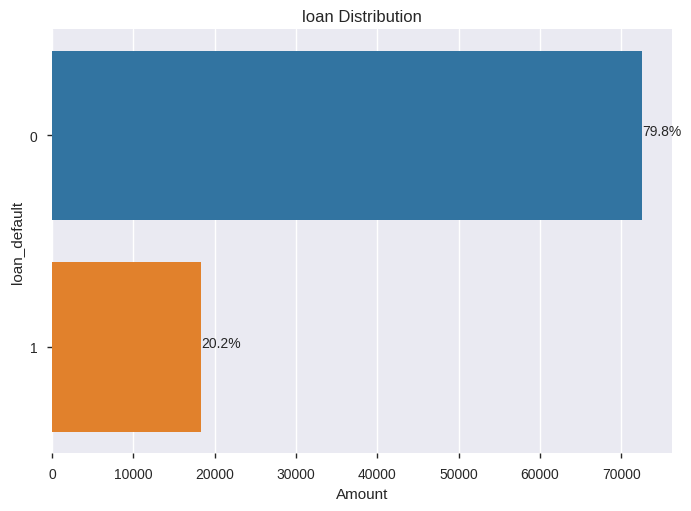

In [0]:
ax = sns.countplot(y="loan_default", data=df)
plt.title('loan Distribution')
plt.xlabel('Amount')

total = len(df['loan_default'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [0]:
# Number of features and amount of samples
df.shape

(90983, 41)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90983 entries, 0 to 90982
Data columns (total 41 columns):
UniqueID                               90983 non-null int64
disbursed_amount                       90983 non-null int64
asset_cost                             90983 non-null int64
ltv                                    90983 non-null float64
branch_id                              90983 non-null int64
supplier_id                            90983 non-null int64
manufacturer_id                        90983 non-null int64
Current_pincode_ID                     90983 non-null int64
Employment.Type                        87476 non-null object
State_ID                               90983 non-null int64
Employee_code_ID                       90983 non-null int64
MobileNo_Avl_Flag                      90983 non-null int64
Aadhar_flag                            90983 non-null int64
PAN_flag                               90983 non-null int64
VoterID_flag                           90983 non

In [0]:
to_change = ['UniqueID','branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']

for col in to_change:
  df[col] = df[col].astype('category')


In [0]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Employment.Type                        3507
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE             

In [0]:
# Check features datatypes
types = df.dtypes
types = pd.DataFrame(types)
types

,0
UniqueID,category
disbursed_amount,int64
asset_cost,int64
ltv,float64
branch_id,category
supplier_id,category
manufacturer_id,category
Current_pincode_ID,category
Employment.Type,object
State_ID,category


In [0]:
# Get categorial features
cat_cols = categorials(df , 'object')


In [0]:
for col in cat_cols:
  df[col] = df[col].astype('category')

In [0]:
# Get numeric features
all_cols = df.columns
num_cols = df._get_numeric_data().columns

In [0]:
# Descriptive statistics
describe(df[num_cols])

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,DaysFromDisbursal
count,90983.000000,9.098300e+04,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,9.098300e+04,9.098300e+04,9.098300e+04,90983.000000,90983.000000,90983.000000,9.098300e+04,9.098300e+04,9.098300e+04,9.098300e+04,9.098300e+04,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000
mean,54128.261917,7.601819e+04,74.232199,288.902048,2.324258,0.997582,0.146478,1.582077e+05,2.147965e+05,2.145034e+05,0.057373,0.026675,0.007518,5.840046e+03,7.337813e+03,7.233098e+03,1.017522e+04,2.484216e+02,0.366827,0.091687,0.729781,1.312486,0.201016,0.201950,32.795819,0.797814
std,12566.202128,1.776635e+04,11.708171,340.572884,4.845184,1.862463,0.527673,9.525700e+05,3.517748e+06,3.521548e+06,0.635089,0.309874,0.114407,2.190335e+05,2.102847e+05,2.097499e+05,1.337679e+05,8.867717e+03,0.922297,0.370708,1.254124,2.326492,0.707042,0.401457,15.453669,0.157011
min,13369.000000,3.765800e+04,10.030000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.397820e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,0.560000
25%,47145.000000,6.624200e+04,68.050000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.690000
50%,53734.000000,7.141800e+04,76.180000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.770000
75%,60213.000000,7.950000e+04,83.400000,680.000000,3.000000,1.000000,0.000000,2.983000e+04,5.647850e+04,5.500000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.843000e+03,0.000000e+00,0.000000,0.000000,1.000000,1.920000,0.000000,0.000000,41.000000,0.850000
max,987354.000000,1.328954e+06,95.000000,890.000000,271.000000,65.000000,23.000000,9.652492e+07,1.000000e+09,1.000000e+09,46.000000,26.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.076655e+07,1.231166e+06,35.000000,12.000000,30.750000,37.420000,23.000000,1.000000,66.000000,1.480000
mad,8943.670120,1.164053e+04,9.126314,323.118988,2.816040,1.188265,0.261575,2.552081e+05,3.363298e+05,3.367896e+05,0.111962,0.052501,0.014947,1.154013e+04,1.445518e+04,1.425219e+04,1.671419e+04,4.924374e+02,0.573792,0.169903,0.844390,1.572133,0.349709,0.322332,9.454582,0.109902
skew,5.130916,6.074259e+00,-1.044392,0.454327,7.045022,4.132418,8.107838,3.514684e+01,2.537079e+02,2.529165e+02,29.468157,29.674841,24.288895,1.076185e+02,8.173581e+01,8.223072e+01,8.042598e+01,7.230080e+01,5.208170,6.108147,3.404398,2.987875,8.097228,1.484874,-2.845424,1.884088


In [0]:
df[cat_cols].describe()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION
count,87476,90983
unique,2,20
top,Self employed,No Bureau History Available
freq,47606,46233


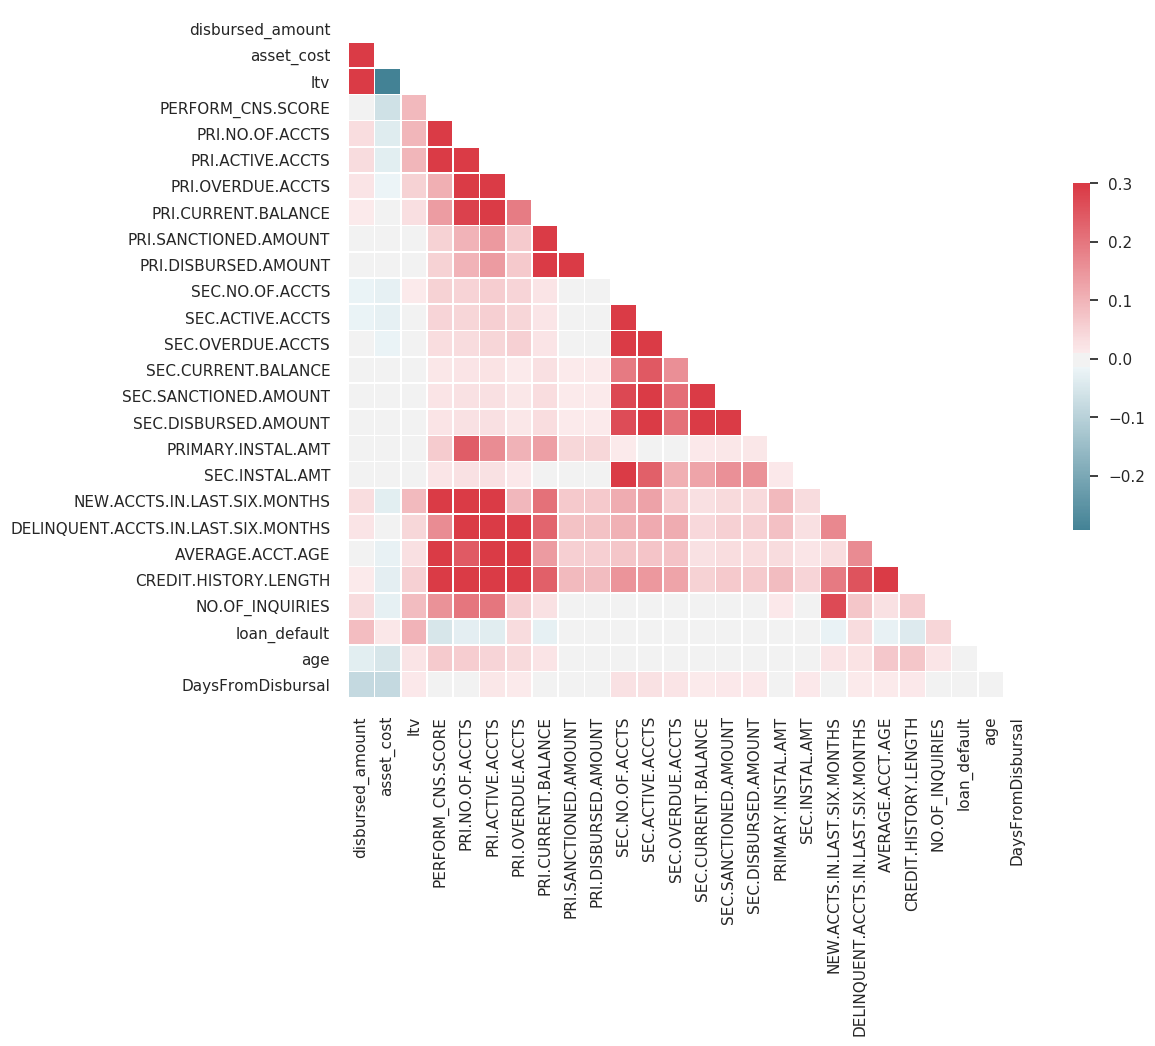

In [0]:
# Compute the correlation matrix
sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [0]:
co = corr.unstack()
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor > 0.8])


0
AVERAGE.ACCT.AGE                    CREDIT.HISTORY.LENGTH                0.835364
CREDIT.HISTORY.LENGTH               AVERAGE.ACCT.AGE                     0.835364
SEC.NO.OF.ACCTS                     SEC.ACTIVE.ACCTS                     0.839136
SEC.ACTIVE.ACCTS                    SEC.NO.OF.ACCTS                      0.839136
SEC.SANCTIONED.AMOUNT               SEC.CURRENT.BALANCE                  0.930014
SEC.CURRENT.BALANCE                 SEC.SANCTIONED.AMOUNT                0.930014
                                    SEC.DISBURSED.AMOUNT                 0.930749
SEC.DISBURSED.AMOUNT                SEC.CURRENT.BALANCE                  0.930749
PRI.SANCTIONED.AMOUNT               PRI.DISBURSED.AMOUNT                 0.998781
PRI.DISBURSED.AMOUNT                PRI.SANCTIONED.AMOUNT                0.998781
SEC.SANCTIONED.AMOUNT               SEC.DISBURSED.AMOUNT                 0.999751
SEC.DISBURSED.AMOUNT                SEC.SANCTIONED.AMOUNT                0.999751
disbursed_amount                    disbursed_amount                     1.000000
loan_default                        loan_default                         1.000000
asset_cost                          asset_cost                           1.000000
ltv                                 ltv                                  1.000000
PERFORM_CNS.SCORE                   PERFORM_CNS.SCORE                    1.000000
PRI.NO.OF.ACCTS                     PRI.NO.OF.ACCTS                      1.000000
PRI.ACTIVE.ACCTS                    PRI.ACTIVE.ACCTS                     1.000000
PRI.OVERDUE.ACCTS                   PRI.OVERDUE.ACCTS                    1.000000
PRI.CURRENT.BALANCE                 PRI.CURRENT.BALANCE                  1.000000
PRI.SANCTIONED.AMOUNT               PRI.SANCTIONED.AMOUNT                1.000000
PRI.DISBURSED.AMOUNT                PRI.DISBURSED.AMOUNT                 1.000000
SEC.NO.OF.ACCTS                     SEC.NO.OF.ACCTS                      1.000000
age                                 age                                  1.000000
SEC.ACTIVE.ACCTS                    SEC.ACTIVE.ACCTS                     1.000000
SEC.CURRENT.BALANCE                 SEC.CURRENT.BALANCE                  1.000000
SEC.SANCTIONED.AMOUNT               SEC.SANCTIONED.AMOUNT                1.000000
SEC.DISBURSED.AMOUNT                SEC.DISBURSED.AMOUNT                 1.000000
PRIMARY.INSTAL.AMT                  PRIMARY.INSTAL.AMT                   1.000000
SEC.INSTAL.AMT                      SEC.INSTAL.AMT                       1.000000
NEW.ACCTS.IN.LAST.SIX.MONTHS        NEW.ACCTS.IN.LAST.SIX.MONTHS         1.000000
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  1.000000
AVERAGE.ACCT.AGE                    AVERAGE.ACCT.AGE                     1.000000
CREDIT.HISTORY.LENGTH               CREDIT.HISTORY.LENGTH                1.000000
NO.OF_INQUIRIES                     NO.OF_INQUIRIES                      1.000000
SEC.OVERDUE.ACCTS                   SEC.OVERDUE.ACCTS                    1.000000
DaysFromDisbursal                   DaysFromDisbursal                    1.000000

In [0]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor < -0.8])

,,0


In [0]:
to_drop = []
to_drop.append(check_corr_with_target(co, 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'))
to_drop.append(check_corr_with_target(co, 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS'))
to_drop.append(check_corr_with_target(co, 'SEC.SANCTIONED.AMOUNT', 'SEC.CURRENT.BALANCE'))
to_drop.append(check_corr_with_target(co, 'SEC.DISBURSED.AMOUNT', 'SEC.CURRENT.BALANCE'))
to_drop.append(check_corr_with_target(co, 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT'))
to_drop.append(check_corr_with_target(co, 'SEC.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT'))


In [0]:
df = drop_cols(df, to_drop)

## Exploratory Data Analysis (EDA)

In [0]:
import pandas_profiling as pp
pp.ProfileReport(df)

Number of variables,36
Number of observations,90983
Total Missing (%),0.1%
Total size in memory,19.9 MiB
Average record size in memory,229.6 B
Numeric,20
Categorical,13
Boolean,1
Date,0
Text (Unique),1
Rejected,1


### Dealing with Categorial features

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['PERFORM_CNS.SCORE.DESCRIPTION'].unique())
df['PERFORM_CNS.SCORE.DESCRIPTION'] = le.transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])

df['Employment.Type'] = df['Employment.Type'].map({'Salaried':'1','Self employed':'0'})

In [0]:
to_change = ['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION']
for col in to_change:
  df[col] = df[col].astype('category')




ValueError: ignored

In [0]:
cat_cols = categorials(df, 'category')

In [0]:
# Number of Unique values
df[cat_cols].nunique()

UniqueID                         90983
branch_id                           55
supplier_id                       1728
manufacturer_id                     10
Current_pincode_ID                4189
Employment.Type                      2
State_ID                            18
Employee_code_ID                   906
MobileNo_Avl_Flag                    1
Aadhar_flag                          2
PAN_flag                             2
VoterID_flag                         2
Driving_flag                         2
Passport_flag                        2
PERFORM_CNS.SCORE.DESCRIPTION       20
dtype: int64

In [0]:
df = drop_cols(df, ['UniqueID', 'MobileNo_Avl_Flag'])

### Dealing with missing data

In [0]:
# Replace mossing values using mode

mode = df[df['Employment.Type']!=np.nan].mode()
df = df.replace(np.nan,mode)

In [0]:
df['Employment.Type'] = df['Employment.Type'].astype('int64')

# Modeling

### LGBM

In [0]:
# Change categories to integers before initializing the model
cat_cols = categorials(df, 'category')

for col in cat_cols:
  df[col] = df[col].astype('int64') 

In [0]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_default', axis=1), df['loan_default'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72786, 33)
(18197, 33)
(72786,)
(18197,)


In [0]:
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False, categorical_feature = cat_cols)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False, categorical_feature = cat_cols)

#### Hyper-Parameter Tuning

In [0]:
#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : 5, # -1 means no limit
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64, # should be smaller than 2^(max_depth)
          'learning_rate': 0.07,
          'max_bin': 255, # Number of bucketed bin for feature values
          'subsample_for_bin': 200, # Number of samples for constructing bin
          'subsample': 0.6, # Subsample ratio of the training instance.
          'subsample_freq': 0, # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.4, # Subsample ratio of columns when constructing each tree.
          'min_split_gain': 0.5, # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'min_child_weight': 1,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_child_samples': 1,  # Minimum number of data in leaf
          'is_unbalance': True,
          'num_class' : 1,
          'metric' : 'binary_error',
          'reg_alpha' : 1 ,# L1 regularization term on weights
          'reg_lambda' : 1 , # L2 regularization term on weights
          'verbose': 1,
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.02, 0.07],
    'max_depth': [5,10],
    'n_estimators': [10,80],
    'num_leaves': [20, 30, 60],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.5,0.75],
    'reg_alpha' : [0, 10],
    'reg_lambda' : [0, 10],  
  }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          is_unbalance = params['is_unbalance'],              
          reg_alpha = params['reg_alpha'],
          reg_lambda = params['reg_lambda'])

In [0]:
# Create the grid
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mdl, gridParams, cv=4, n_jobs=-1)

In [0]:
# Run the grid
grid.fit(X_train, y_train,)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 10, 'num_leaves': 20, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.5}
0.7982853845519743


In [0]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['objective'] = grid.best_params_['objective']
params['random_state'] = grid.best_params_['random_state']
params['subsample'] = grid.best_params_['subsample']
params['num_leaves'] = grid.best_params_['num_leaves']
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['max_depth'] = grid.best_params_['max_depth']



In [0]:
%%time
lgbm = lgb.train(params, lgb_train, num_boost_round=300)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


CPU times: user 444 ms, sys: 56.8 ms, total: 500 ms
Wall time: 318 ms


In [0]:
y_prob = lgbm.predict(X_test)

#### Features Importance

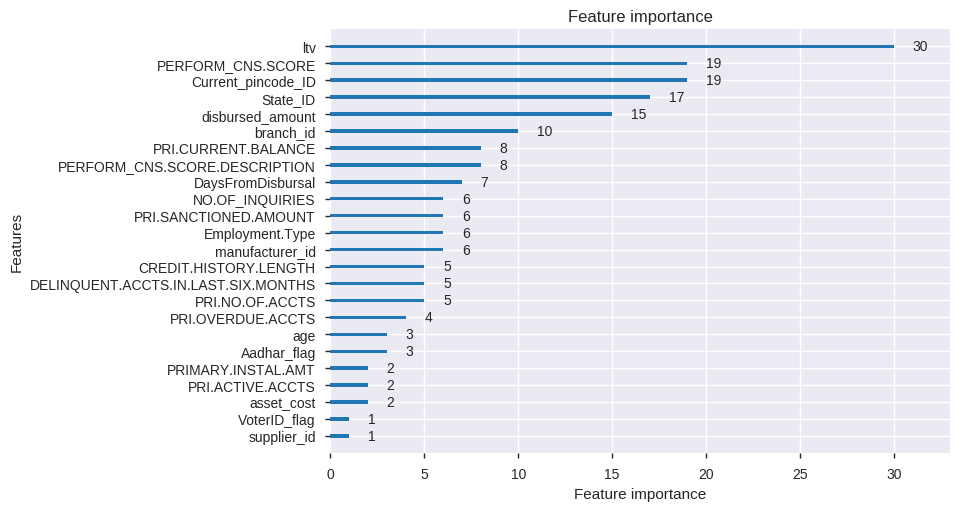

In [0]:
#Plot Variable Importances
lgb.plot_importance(lgbm, importance_type='split')
plt.show()

### Evaluation

In [0]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.3f' % auc)

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Turn probability to 0-1 (binary output) using the best threshold
y_pred = np.where(y_prob > optimal_threshold, 1, 0) 

AUC: 0.635


<Figure size 800x550 with 0 Axes>

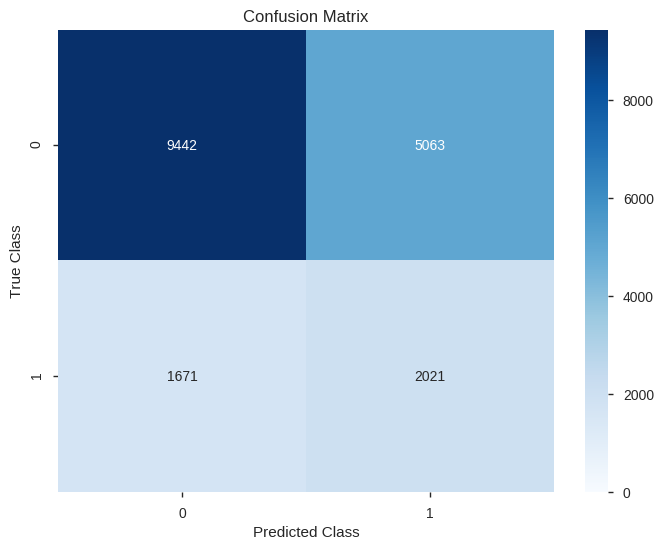

In [0]:
# Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, y_pred)
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [0]:
# Calculate scores
print("Recall: {0}".format(round(recall_score(y_test, y_pred),4)))
print("Precision: {0}".format(round(precision_score(y_test, y_pred),4)))
print("F1-score: {0}".format(f1_score(y_test, y_pred)))

Recall: 0.5474
Precision: 0.2853
F1-score: 0.3750927988121752
